## Imports

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [274]:
#  Import data

In [275]:
train_data=pd.read_csv('train.csv')

In [276]:
test=pd.read_csv('test.csv')

## Preprocessing


In [277]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [278]:
train=train_data[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]

In [279]:
data=pd.concat([train,test])
data['Ind']=range(0,2919)
data.set_index('Ind',inplace=True)

In [280]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Ind,,,,,,,,,,,,,,,,,,,,,
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [281]:
data.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Ind,,,,,,,,,,,,,,,,,,,,,
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


## Missing data handling

In [282]:
# Collecting the features which have missing data

miss_cols={}
del_cols={}
miss_dict=dict(data.isnull().sum()>0) 
for i in miss_dict:
    if ( (miss_dict[i]) & (data[i].isnull().sum()<100) ):
        miss_cols.update({i:data[i].isnull().sum()})
    elif data[i].isnull().sum()>0:
        del_cols.update({i:data[i].isnull().sum()})
    

In [283]:
# Columns need to be deleted

data.drop(axis=1,columns=del_cols,inplace=True)
del_cols

{'Alley': 2721,
 'Fence': 2348,
 'FireplaceQu': 1420,
 'GarageCond': 159,
 'GarageFinish': 159,
 'GarageQual': 159,
 'GarageType': 157,
 'GarageYrBlt': 159,
 'LotFrontage': 486,
 'MiscFeature': 2814,
 'PoolQC': 2909}

In [284]:
# Missing data columns

miss_cols

{'BsmtCond': 82,
 'BsmtExposure': 82,
 'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtFinType1': 79,
 'BsmtFinType2': 80,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'BsmtQual': 81,
 'BsmtUnfSF': 1,
 'Electrical': 1,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'Functional': 2,
 'GarageArea': 1,
 'GarageCars': 1,
 'KitchenQual': 1,
 'MSZoning': 4,
 'MasVnrArea': 23,
 'MasVnrType': 24,
 'SaleType': 1,
 'TotalBsmtSF': 1,
 'Utilities': 2}

### 'BsmtCond'

data['BsmtCond'].value_counts()

In [117]:
data['BsmtCond'].fillna(value='TA',inplace=True)

data['BsmtCond'].isnull().sum()

### 'BsmtExposure'

data['BsmtExposure'].value_counts()

In [120]:
data['BsmtExposure'].fillna(value='No',inplace=True)

data['BsmtExposure'].isnull().sum()

### 'BsmtFinSF1' &  'BsmtFinType2'

In [122]:
data['BsmtFinSF2'].fillna(value=0.0,inplace=True)

In [123]:
data['BsmtFinSF1'].fillna(value=0.0,inplace=True)

data['BsmtFinSF1'].isnull().sum()

data['BsmtFinSF2'].isnull().sum()

### 'BsmtFinType1' & 'BsmtFinType2'

data['BsmtFinType1'].value_counts()

In [127]:
data['BsmtFinType1'].fillna(value='Unf',inplace=True)

data['BsmtFinType2'].value_counts()

In [129]:
data['BsmtFinType2'].fillna(value='Unf',inplace=True)

###  'BsmtFullBath' & 'BsmtHalfBath'

data['BsmtFullBath'].value_counts()

data[data['BsmtFullBath'].isnull()]['BsmtCond']

In [132]:
data['BsmtFullBath'].fillna(value=0.0,inplace=True)

data['BsmtHalfBath'].value_counts()

data[data['BsmtHalfBath'].isnull()]['BsmtCond']

In [135]:
data['BsmtHalfBath'].fillna(value=0.0,inplace=True)

### BsmtQual

data['BsmtQual'].value_counts()

In [137]:
data['BsmtQual'].fillna('TA',inplace=True)

data['BsmtQual'].isnull().sum()

### 'BsmtUnfSF'

data['BsmtUnfSF'].value_counts()

In [140]:
data['BsmtUnfSF'].fillna(value=0.0,inplace=True)

### 'Electrical'

data['Electrical'].value_counts()

In [142]:
data['Electrical'].fillna(value='SBrkr',inplace=True)

### 'Exterior1st'

data['Exterior1st'].value_counts()

In [144]:
data['Exterior1st'].fillna(value='VinylSd',inplace=True)

### 'Exterior2nd'

In [145]:
data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [146]:
data['Exterior2nd'].fillna(value='VinylSd',inplace=True)

### 'Functional'

In [147]:
data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [148]:
data['Functional'].fillna(value='Typ',inplace=True)

### 'GarageArea'

In [149]:
data[data['GarageArea'].isnull()]['GarageCars']

Ind
2576   NaN
Name: GarageCars, dtype: float64

In [150]:
data['GarageArea'].fillna(value=0.0,inplace=True)

### 'GarageCars'

In [151]:
data['GarageCars'].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [152]:
data[data['GarageCars'].isnull()]['GarageArea']

Ind
2576    0.0
Name: GarageArea, dtype: float64

In [153]:
data['GarageCars'].fillna(0.0,inplace=True)

### 'KitchenQual'

In [154]:
data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [155]:
data[data['KitchenQual'].isnull()]['KitchenAbvGr']

Ind
1555    1
Name: KitchenAbvGr, dtype: int64

In [156]:
data['KitchenAbvGr'].value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

In [157]:
data[data['KitchenAbvGr']==1]['KitchenQual'].value_counts()

TA    1372
Gd    1146
Ex     205
Fa      61
Name: KitchenQual, dtype: int64

In [158]:
data['KitchenQual'].fillna(value='TA',inplace=True)

### 'MSZoning'

In [159]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [160]:
data['MSZoning'].fillna(value='RL',inplace=True)

### 'MasVnrArea'

In [161]:
data['MasVnrArea'].value_counts()

0.0       1738
120.0       15
176.0       13
200.0       13
216.0       12
180.0       12
144.0       11
72.0        11
108.0       11
16.0        11
340.0       10
80.0         9
210.0        9
128.0        9
196.0        9
256.0        8
178.0        8
40.0         8
302.0        8
170.0        8
132.0        8
260.0        7
300.0        7
203.0        7
186.0        7
456.0        7
420.0        7
50.0         7
252.0        7
106.0        7
          ... 
81.0         1
528.0        1
91.0         1
87.0         1
97.0         1
63.0         1
408.0        1
47.0         1
39.0         1
118.0        1
1170.0       1
376.0        1
584.0        1
322.0        1
634.0        1
532.0        1
1290.0       1
519.0        1
287.0        1
571.0        1
435.0        1
886.0        1
237.0        1
738.0        1
1050.0       1
664.0        1
247.0        1
550.0        1
137.0        1
572.0        1
Name: MasVnrArea, Length: 444, dtype: int64

In [162]:
len(data[data['MasVnrArea'].isnull()]['MasVnrType']==np.nan)

23

In [163]:
data['MasVnrArea'].fillna(value=0.0,inplace=True)

###  'MasVnrType'

In [164]:
data['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [165]:
data['MasVnrType'].fillna('None',inplace=True)

### 'SaleType'

In [166]:
data['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [167]:
data['SaleType'].fillna('WD',inplace=True)

### 'TotalBsmtSF'

In [168]:
data['TotalBsmtSF'].value_counts()

0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
768.0     24
816.0     23
728.0     20
1008.0    19
780.0     19
384.0     19
960.0     18
894.0     17
756.0     17
832.0     17
546.0     16
936.0     16
720.0     16
600.0     16
848.0     16
483.0     14
630.0     13
952.0     13
840.0     13
988.0     12
624.0     12
876.0     11
784.0     11
796.0     11
1056.0    10
          ..
1967.0     1
1905.0     1
1679.0     1
1533.0     1
2140.0     1
1994.0     1
1378.0     1
763.0      1
1047.0     1
1376.0     1
904.0      1
370.0      1
1570.0     1
2033.0     1
1709.0     1
1519.0     1
2077.0     1
1550.0     1
797.0      1
699.0      1
559.0      1
396.0      1
1866.0     1
1641.0     1
961.0      1
1949.0     1
1231.0     1
1829.0     1
1475.0     1
1243.0     1
Name: TotalBsmtSF, Length: 1058, dtype: int64

In [169]:
data[data['TotalBsmtSF'].isnull()]['BsmtCond']

Ind
2120    TA
Name: BsmtCond, dtype: object

In [170]:
data['TotalBsmtSF'].fillna(0.0,inplace=True)

### 'Utilities'

In [171]:
data['Utilities'].isnull().sum()

2

In [172]:
data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [173]:
data['Utilities'].fillna('AllPub',inplace=True)

In [174]:
data['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

## Categorical to Numerical

In [175]:
type(data['YrSold'][0])

numpy.int64

In [176]:
num_cols=[]
for i in data.columns:
    if type(data[i][0])==np.int64:
        num_cols.append(i)
    

In [177]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

In [178]:
def cat_num(cat):
    global data
    if len(data[cat].value_counts())==2:
        print(cat)
        data[cat]=LabelEncoder().fit_transform(data[cat])
    elif len(data[cat].value_counts())>2:
        lb=LabelBinarizer()
        lbr=lb.fit_transform(data[cat])
        lbd=pd.DataFrame(data=lbr,columns=lb.classes_)
        data=pd.concat([data,lbd],axis=1)
        data.drop(columns=cat,inplace=True)


In [179]:
cat_cols=[]
for i in data.columns:
    if type(data[i][0])==str:
        #cat_num(i)
        cat_cols.append(i)
        

## Category columns handling

In [180]:
cat_cols[0]

'MSZoning'

### 'MSZoning'

In [181]:
data['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

Density of population increases the house prices.so 

       C	Commercial--->10
       RH	Residential High Density--->8
       RM	Residential Medium Density--->6
       RL	Residential Low Density--->4
       FV	Floating Village Residential--->2
       
       

In [182]:
replace_map={'MSZoning': {'C (all)': 10, 'RH': 8, 'RM': 6, 'RL': 4, 'FV':2}}

In [183]:
data.replace(replace_map,inplace=True)

In [184]:
data['MSZoning'].value_counts()

4     2269
6      460
2      139
8       26
10      25
Name: MSZoning, dtype: int64

### 

In [185]:
data[cat_cols[5]].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [186]:
replace_map={'LotConfig': {'FR3': 10, 'FR2': 8, 'Corner': 6, 'Inside': 4,'CulDSac':2}}

In [187]:
data.replace(replace_map,inplace=True)

In [188]:
data[cat_cols[6]].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

In [189]:
replace_map={'LandSlope': {'Gtl': 10, 'Mod': 5, 'Sev': 1}}

In [190]:
data.replace(replace_map,inplace=True)

In [191]:
data[cat_cols[8]].value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

Condition1: Proximity to various conditions

	   PosN	  Near positive off-site feature--park, greenbelt, etc. --->10
       PosA	  Adjacent to postive off-site feature  --->8
       Artery	Adjacent to arterial street--->7
       Feedr	Adjacent to feeder street-->6	
       Norm	Normal-->5	
       RRAn	Adjacent to North-South Railroad--->3
       RRAe	Adjacent to East-West Railroad--->3
       RRNn	Within 200 of North-South Railroad--->1
       RRNe	Within 200 of East-West Railroad--->1
       

In [192]:
replace_map={'Condition1':{'PosN':10, 'PosA':8,'Artery':5,'Feedr':6,'Norm':7,'RRAn':3,'RRAe':3,'RRNn':1,'RRNe':1},
            'Condition2':{'PosN':10, 'PosA':8,'Artery':5,'Feedr':6,'Norm':7,'RRAn':3,'RRAe':3,'RRNn':1,'RRNe':1}}

In [193]:
data.replace(replace_map,inplace=True)

In [194]:
data['Conditions']=data['Condition1']+data['Condition2']

In [195]:
data.drop(columns=['Condition1'],inplace=True)
data.drop(columns=['Condition2'],inplace=True)

In [196]:
data['BldgType'].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

BldgType: Type of dwelling
		
       Duplx	Duplex  --->10
       TwnhsE	Townhouse End Unit --->8  
       TwnhsI	Townhouse Inside Unit --->6
       2FmCon	Two-family Conversion; originally built as one-family dwelling--->4
       1Fam	Single-family Detached--->2

In [197]:
replace_map={'BldgType':{'Duplex':10,'TwnhsE':8,'Twnhs':6,'2fmCon':4,'1Fam':2}}

In [198]:
data.replace(replace_map,inplace=True)

data[cat_cols[11]].value_counts()

HouseStyle: Style of dwelling

	   SFoyer	Split Foyer--->10
       SLvl	  Split Level--->9
       2.5Fin	Two and one-half story: 2nd level finished--->8
       2Story	Two story--->7
       2.5Unf	Two and one-half story: 2nd level unfinished--->6
       1.5Fin	One and one-half story: 2nd level finished--->5
       1.5Unf	One and one-half story: 2nd level unfinished--->4
       1Story	One story--->3

       

       


In [199]:
replace_map={'HouseStyle':{'SFoyer':4,'SLvl':7,'2.5Fin':10,'2Story':9,'2.5Unf':8,'1.5Fin':6,'1.5Unf':5,'1Story':3}}

In [200]:
data.replace(replace_map,inplace=True)

data['Foundation'].value_counts()

Foundation: Type of foundation

       PConc	Poured Contrete--->10
	   Stone	Stone--->8
       Slab	Slab--->9
       BrkTil	Brick & Tile--->7
       CBlock	Cinder Block--->6
       Wood	Wood--->5

In [201]:
replace_map={'Foundation':{'PConc':9,'Slab':10,'Stone':8,'BrkTil':7,'CBlock':6,'Wood':5}}

In [202]:
data.replace(replace_map,inplace=True)

In [203]:
data[cat_cols[17]].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent -->10
       Gd	Good-->8
       TA	Average/Typical-->6
       Fa	Fair-->4
       Po	Poor-->2

In [204]:
replace_map={'ExterQual':{'Ex':10,'Gd':8,'TA':6,'Fa':4,'Po':2}}

In [205]:
data.replace(replace_map,inplace=True)

In [206]:
data[cat_cols[18]].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [207]:
replace_map={'ExterCond':{'Ex':10,'Gd':8,'TA':6,'Fa':4,'Po':2}}

In [208]:
data.replace(replace_map,inplace=True)

In [209]:
data[cat_cols[20]].value_counts()

TA    1364
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [210]:
replace_map={'BsmtQual':{'Ex':10,'Gd':8,'TA':6,'Fa':4,'Po':2}}

In [211]:
replace_map={'BsmtQual':{'Ex':10,'Gd':8,'TA':6,'Fa':4,'Po':2}}

In [212]:
data[cat_cols[21]].value_counts()

TA    2688
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [213]:
replace_map={'BsmtCond':{'Ex':10,'Gd':8,'TA':6,'Fa':4,'Po':2}}

In [214]:
data.replace(replace_map,inplace=True)

In [215]:
data[cat_cols[22]].value_counts()

No    1986
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure --->10
       Av	Average Exposure (split levels or foyers typically score average or above)--->8
       Mn	Mimimum Exposure--->6
       No	No Exposure--->4
       NA	No Basement--->2
	

In [216]:
replace_map={'BsmtExposure':{'Gd':10,'Av':8,'Mn':6,'No':4,'Na':2}}

In [217]:
data.replace(replace_map,inplace=True)

In [218]:
data[cat_cols[23]].value_counts()

Unf    930
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters-->10
       ALQ	Average Living Quarters-->5
       BLQ	Below Average Living Quarters-->4	
       Rec	Average Rec Room-->3
       LwQ	Low Quality-->2
       Unf	Unfinshed-->1
       NA	No Basement-->0

In [219]:
replace_map={'BsmtFinType1':{'GLQ':10,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1}}

In [220]:
data.replace(replace_map,inplace=True)

In [221]:
cat_cols=[]
for i in data.columns:
    if type(data[i][0])==str:
        cat_num(i)
        cat_cols.append(i)
        

Street
Utilities
CentralAir


In [222]:
data['CentralAir'].value_counts()

1    2723
0     196
Name: CentralAir, dtype: int64

In [223]:
data.head(1)

,Id,MSSubClass,MSZoning,LotArea,Street,Utilities,LotConfig,LandSlope,BldgType,HouseStyle,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
0,1,60,4,8450,1,0,4,10,2,9,...,0,0,0,1,0,0,0,0,1,0


##  Outlier Detection

In [224]:
def Outlier_Detecter(data,feature):
    Q1=data[feature].quantile(0.25)
    Q3=data[feature].quantile(0.75)
    IQR=Q3-Q1
    Lower_lim=Q1-1.5*IQR
    Upper_lim=Q3+1.5*IQR
    return len(data[(data[feature] < Lower_lim ) & (data[feature] > Upper_lim)])

In [225]:
outliers=[]
for i in num_cols:
    len_out=Outlier_Detecter(data,i)
    if len_out >0:
        outliers.append(i)

In [226]:
outliers

[]

**There is no outliers found**

###  Train Test Split

In [227]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Utilities,LotConfig,LandSlope,BldgType,HouseStyle,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
0,1,60,4,8450,1,0,4,10,2,9,...,0,0,0,1,0,0,0,0,1,0
1,2,20,4,9600,1,0,8,10,2,3,...,0,0,0,1,0,0,0,0,1,0
2,3,60,4,11250,1,0,4,10,2,9,...,0,0,0,1,0,0,0,0,1,0
3,4,70,4,9550,1,0,6,10,2,9,...,0,0,0,1,1,0,0,0,0,0
4,5,60,4,14260,1,0,8,10,2,9,...,0,0,0,1,0,0,0,0,1,0


In [228]:
print('Train dataset shape:{0}, \nTest dataset shape:{1}'.format(train.shape,test.shape))

Train dataset shape:(1460, 80), 
Test dataset shape:(1459, 80)


In [229]:
data_copy=data.copy()

In [230]:
data=data_copy.copy()

In [231]:
train.index

RangeIndex(start=0, stop=1460, step=1)

In [232]:
x_train=data[:1460]

x_train=x_train[num_cols]

In [233]:
x_train.drop(columns='Id',inplace=True)

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [234]:
x_test=data[1460:]

x_test=x_test[num_cols]

In [235]:
x_test.drop(columns='Id',inplace=True)

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [236]:
print('Train dataset shape:{0}, \nTest dataset shape:{1}'.format(x_train.shape,x_test.shape))

Train dataset shape:(1460, 186), 
Test dataset shape:(1459, 186)


In [237]:
y_train=train_data['SalePrice']

In [238]:
x_train.head(1)

,MSSubClass,MSZoning,LotArea,Street,Utilities,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
0,60,4,8450,1,0,4,10,2,9,7,...,0,0,0,1,0,0,0,0,1,0


In [239]:
x_test.head(1)

,MSSubClass,MSZoning,LotArea,Street,Utilities,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
1460,20,8,11622,1,0,4,10,2,3,5,...,0,0,0,1,0,0,0,0,1,0


In [240]:
y_train.head(1)

0    208500
Name: SalePrice, dtype: int64

##  Feature Selection

In [241]:
from sklearn.feature_selection import SelectKBest, chi2

In [242]:
kbest=SelectKBest(score_func=chi2,k=30)
kbestf=kbest.fit(x_train,y_train)

In [243]:
len(kbestf.scores_)

186

In [244]:
score=pd.DataFrame({'Score':kbestf.scores_,'Features':x_train.columns})

In [245]:
kbest25=list(score.nlargest(246,columns='Score')['Features'])

In [246]:
len(kbest25)

186

In [247]:
x_train_f=x_train[kbest25]

In [248]:
x_test_f=x_test[kbest25]

## Machine Learning

In [249]:
from sklearn.linear_model import LinearRegression,Lasso,LogisticRegression
from xgboost import XGBRegressor

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\xgboost\__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


###  Linear Regression

In [250]:
lr=LinearRegression()

In [251]:
lrf=lr.fit(x_train_f,y_train)

In [252]:
y_predict=lrf.predict(x_test_f)

In [253]:
y_predict

array([110556.20412591, 143883.76546693, 183156.5195165 , ...,
       164949.04656962, 102478.62770672, 221374.26112631])

In [254]:
'''Saving the results in Csv'''
data={'Id':range(1461,2920),'SalePrice':y_predict}
pd.DataFrame(data).set_index('Id').to_csv(r'submission files/submission_NH06.csv')

In [255]:
best_score=pd.read_csv(r'submission files/submission_NH05.csv')

In [256]:
a=best_score['SalePrice']-y_predict

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


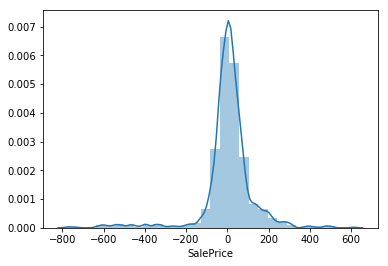

In [257]:
#fig,ax1=plt.subplot(1,1)
sns.distplot(a,bins=30)


In [258]:
best_score['new']=y_predict

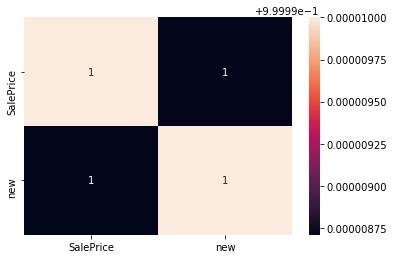

In [259]:
sns.heatmap(best_score[['SalePrice','new']].corr(),annot=True)

### Random Forest Regressor

In [260]:
from sklearn.ensemble import RandomForestRegressor

In [261]:
rfs=RandomForestRegressor()

In [262]:
svr=rfs.fit(x_train_f,y_train)

In [263]:
y_predict=svr.predict(x_test_f)

In [264]:
y_predict

array([126943.26, 157002.82, 177229.71, ..., 153788.46, 116456.  ,
       230811.8 ])

Saving the results in Csv
data={'Id':range(1461,2920),'SalePrice':y_predict}
pd.DataFrame(data).set_index('Id').to_csv(r'submission files/submission_mhdLR.csv')

In [265]:
best_score=pd.read_csv(r'submission files/submission_05dlr.csv')

In [266]:
a=best_score['SalePrice']-y_predict

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


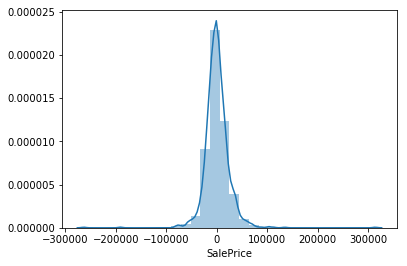

In [267]:
#fig,ax1=plt.subplot(1,1)
sns.distplot(a,bins=30)


In [268]:
best_score['new']=y_predict

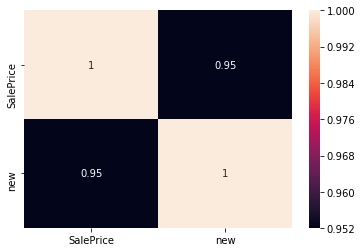

In [269]:
sns.heatmap(best_score[['SalePrice','new']].corr(),annot=True)

##  XGB Regressor

In [270]:
xgb=XGBRegressor()

In [271]:
xgb_fit=xgb.fit(x_train_f,y_train)

ValueError: feature_names must be unique

In [ ]:
y_predict=svr.predict(x_test_f)

In [ ]:
y_predict

Saving the results in Csv
data={'Id':range(1461,2920),'SalePrice':y_predict}
pd.DataFrame(data).set_index('Id').to_csv(r'submission files/submission_mhdLR.csv')

In [ ]:
best_score=pd.read_csv(r'submission files/submission_05dlr.csv')

In [ ]:
a=best_score['SalePrice']-y_predict

In [ ]:
#fig,ax1=plt.subplot(1,1)
sns.distplot(a,bins=30)


In [ ]:
best_score['new']=y_predict

In [ ]:
sns.heatmap(best_score[['SalePrice','new']].corr(),annot=True)

## Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr=SVR()

In [ ]:
svr=svr.fit(x_train_f,y_train)

In [ ]:
y_predict=svr.predict(x_test_f)

In [ ]:
y_predict

In [ ]:
#  # Saving the results in Csv
data={'Id':range(1461,2920),'SalePrice':y_predict}
pd.DataFrame(data).set_index('Id').to_csv(r'submission files/submission_mhdLR.csv')

In [ ]:
best_score=pd.read_csv(r'submission files/submission_lr.csv')

In [ ]:
a=best_score['SalePrice']-y_predict

In [ ]:
#fig,ax1=plt.subplot(1,1)
sns.distplot(a,bins=30)


In [ ]:
best_score['new']=y_predict

In [ ]:
sns.heatmap(best_score[['SalePrice','new']].corr(),annot=True)